In [116]:
# SCRIPT PARA GRAFICADO Y ANALISIS DE RESULTADOS INVERSION CONJUNTA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Correr mediante comandos magicos el script en bash para ejecutar el software (Parametros ya deben estar configurados en el scritp de modelado o inversion)
%time %system ./run_inversion.sh

CPU times: user 4.73 ms, sys: 3.15 ms, total: 7.88 ms
Wall time: 45 s


[' Total number of data:           400',
 ' Total number of parameters:          4000']

Data size (25, 5)
<bound method NDFrame.head of      iteracion  convergencia%_gv  convergencia%_mg  RMS_gv  RMS_mg
0            1            0.0102            0.0123  2.6253  2.0153
1            2        34931.6836        41492.2617  2.4956  1.7865
2            3            0.0061            0.0087  2.4956  1.7865
3            4          369.5562          956.7583  2.0224  1.6740
4            5            0.0070            0.0211  2.0224  1.6740
5            6          248.6593          535.5337  1.5604  1.6824
6            7            0.0109            0.0126  1.5604  1.6824
7            8           92.7671          250.6215  1.4405  1.7020
8            9            0.0042            0.0114  1.4405  1.7020
9           10          186.3644          930.7369  1.3221  1.7412
10          11            0.0031            0.0074  1.3221  1.7412
11          12          253.1131          257.8271  1.2370  1.7756
12          13            0.0035            0.0076  1.2370  1.7756
13          14

Text(0, 0.5, 'RMS of Normalized Residuals')

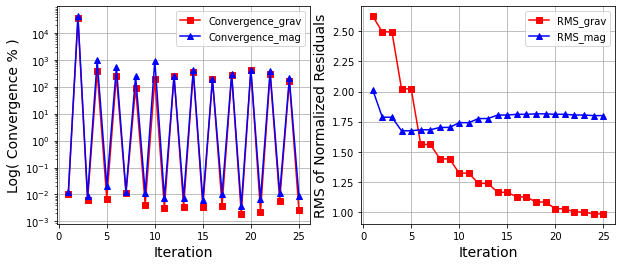

In [6]:
# Graficado de error de ajuste RMS y convergencias

#Lectura datos
filename = 'output_misfit_jointGram_c1.txt'
error = pd.read_csv(filename, sep=',', header=0)
print('Data size',error.shape)
print(error.head)
#print(error.iloc[:,0])

#Seleccion de columnas
iteracion = error.iloc[0:41,0]
conv_gv = error.iloc[0:41,1]
conv_mg = error.iloc[0:41,2]
rms_gv = error.iloc[0:41,3]
rms_mg = error.iloc[0:41,4]

# Gráfico
def add_value_label(aa,x_list,y_list):
    for i in range(1, len(x_list)+1):
        ax[aa].text(i,y_list[i-1],y_list[i-1], ha="center")


fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax[0].semilogy(iteracion, conv_gv, 'rs-', label="Convergence_grav")
ax[0].semilogy(iteracion, conv_mg, 'b^-', label="Convergence_mag")
ax[0].legend()
ax[0].grid(True)
ax[0].set_xlabel("Iteration", size = 14)
ax[0].set_ylabel("Log( Convergence % )", size = 14)
#add_value_label(0,iteracion, conv_gv)
#add_value_label(0,iteracion, conv_mg)


ax[1].plot(iteracion, rms_gv, 'rs-', label="RMS_grav")
ax[1].plot(iteracion, rms_mg, 'b^-', label="RMS_mag")
ax[1].legend()
ax[1].grid(True)
ax[1].set_xlabel("Iteration", size = 14)
ax[1].set_ylabel("RMS of Normalized Residuals", size = 14)
#add_value_label(1,iteracion, rms_gv)
#add_value_label(1,iteracion, rms_mg)

#Exportar imagenes en carpeta
#plt.savefig('convergencia.jpg', dpi=400)

In [7]:
iteraciones = 1 + 25

<bound method NDFrame.head of          x_utm       y_utm  aCB_Res_mGal
0    368260.02  2532272.27     -0.912049
1    367392.29  2532642.05      0.519532
2    367427.80  2532608.53      0.510775
3    367458.35  2532594.86      0.505759
4    367506.17  2532595.88      0.508978
..         ...         ...           ...
463  369434.00  2532721.00      0.042065
464  369434.00  2532821.00      0.039338
465  369434.00  2532921.00      0.038601
466  369434.00  2533021.00      0.092460
467  369434.00  2533121.00      0.199403

[468 rows x 3 columns]>
<bound method NDFrame.head of           g[mGal]
0   -6.341000e-09
1    9.572000e-09
2    1.138000e-08
3    1.246000e-08
4    1.383000e-08
..            ...
463  1.122000e-09
464  9.344000e-10
465  8.077000e-10
466  7.548000e-10
467  7.058000e-10

[468 rows x 1 columns]>
<bound method NDFrame.head of       g[mGal]
0   -0.000617
1    0.029180
2    0.034710
3    0.038180
4    0.042560
..        ...
463  0.004405
464  0.003702
465  0.003195
466  0.00290

<ipython-input-8-46bd831db79d>:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


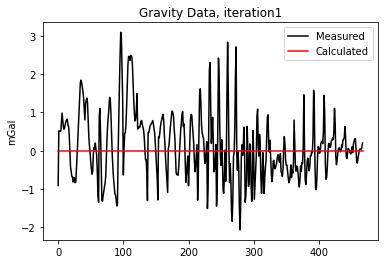

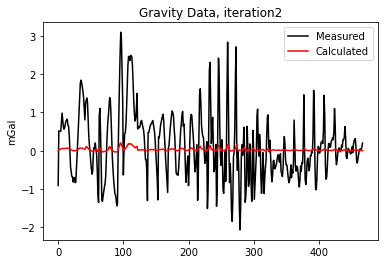

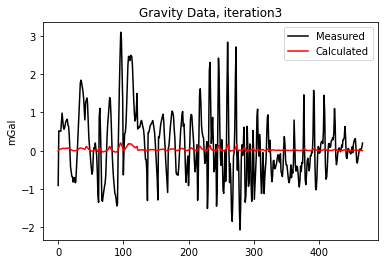

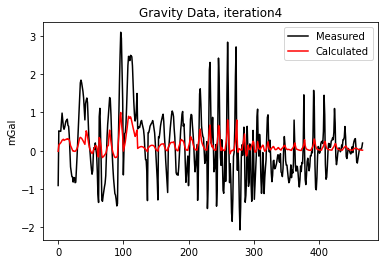

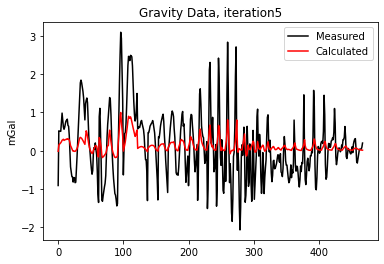

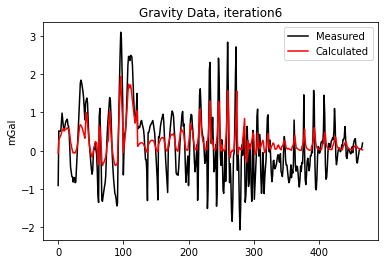

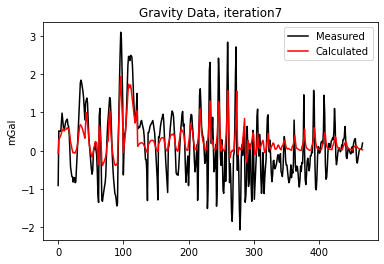

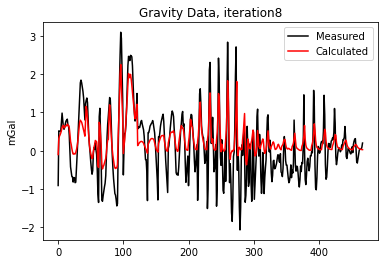

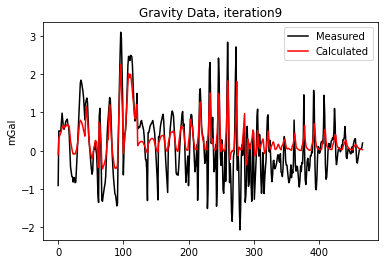

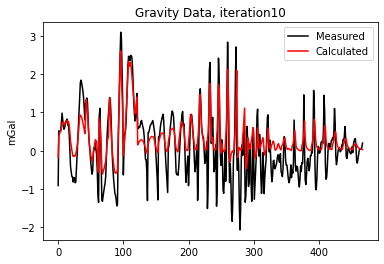

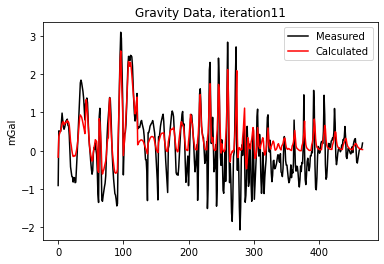

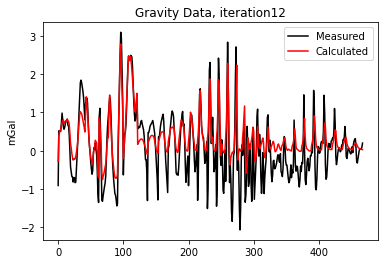

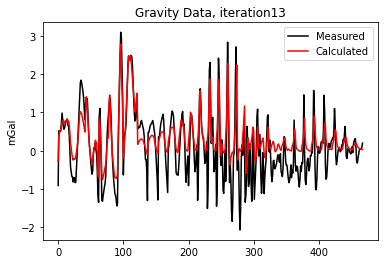

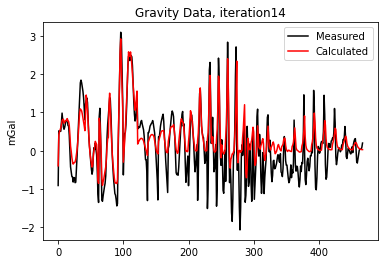

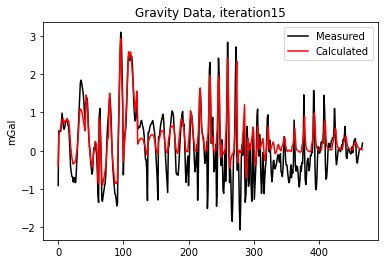

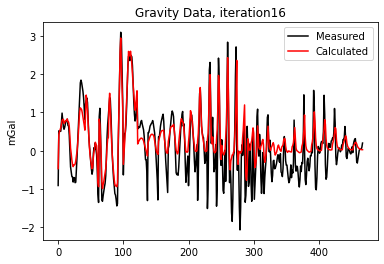

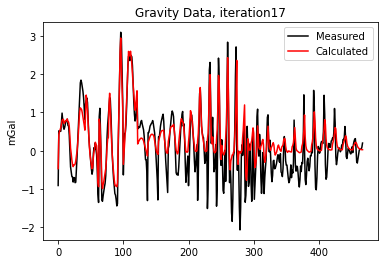

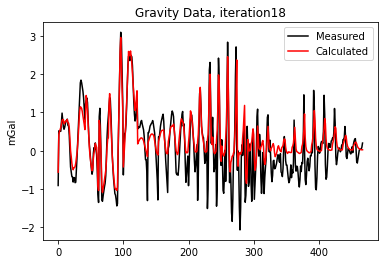

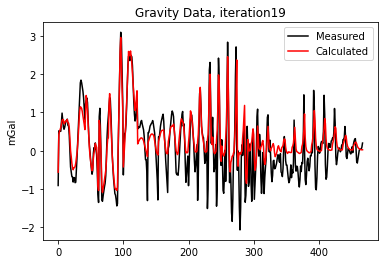

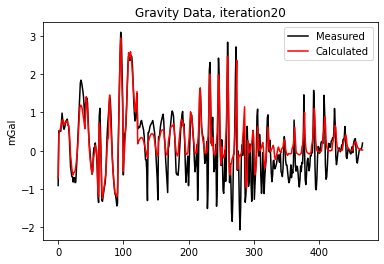

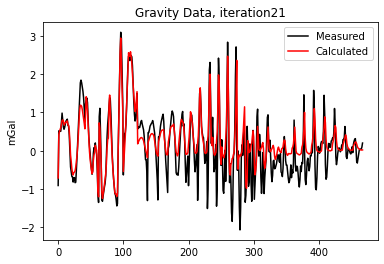

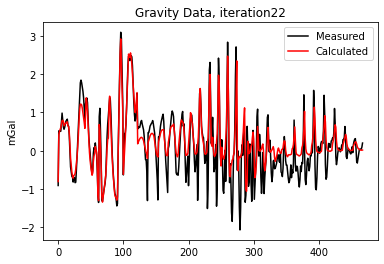

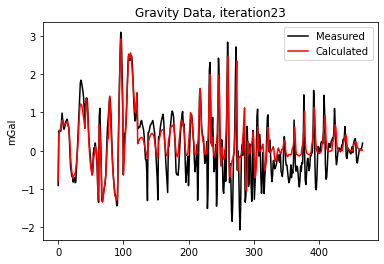

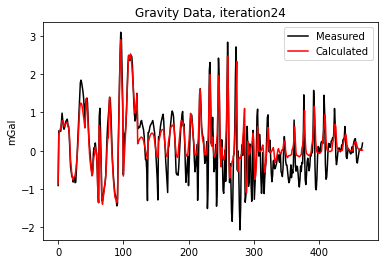

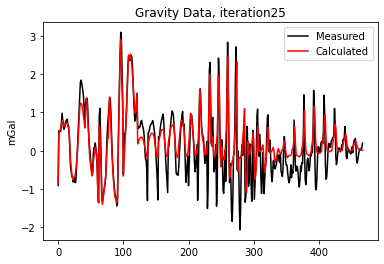

In [8]:
# Graficado de datos campo vs datos calculados, con barras de desviacion standard

#Gravimetria
#Lectura datos
filename1 = 'input_d_gv.csv'
#d_gv = pd.read_csv(filename1, sep=',', header=0, usecols=['x_utm', 'y_utm', 'anom_CB_residual'])
d_gv = pd.read_csv(filename1, sep=',', header=0, usecols=[0,1,3])
print(d_gv.head)

#Seleccion de columnas
x = d_gv.iloc[:,0]
y = d_gv.iloc[:,1]
d = pd.Series(d_gv.iloc[:,2])

num = np.arange(0, len(d), 1, dtype=int)

for i in range(1,10):
    #Desajuste de datos
    filename2 = f'output_jointGram_gv_anomaly_c1_iter {i}.csv'
    iter1 = pd.read_csv(filename2, sep=',', header=0, usecols=['g[mGal]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p

    # Crear figura 3D
    ########################################
    #%matplotlib notebook #figura interactiva
    #fig = plt.figure(figsize = (10, 8))
    #ax = plt.axes(projection ="3d")

    # Crear gráfico
    #ax.scatter3D(x,y,0, s=20, color='black')
    #ax.scatter3D(x,y,misfit, s=50, color='red')

    #plt.title("Datos Gravimétricos")
    #ax.set_xlabel('x_utm')
    #ax.set_ylabel('y_utm')
    #ax.set_zlabel('mGal')
    #punto de vista
    #ax.view_init(0,90)

    # desactivar formato cientifico en etiquetas
    #current_values = plt.gca().get_yticks()
    #plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    # ejes proporcionales
    #ax.set_aspect('equal', adjustable='box')
    #plt.axis("equal")
    ########################################

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'r-')
    legend = plt.legend(['Measured','Calculated'])
    plt.title(f"Gravity Data, iteration{i}")
    plt.ylabel('mGal')
    #plt.show()
    
    #Exportar imagenes en carpeta
    #plt.savefig(f"ajuste_datos_gv_iter{i}.jpg", dpi=400)
    
for i in range(10,iteraciones):
    #Desajuste de datos
    filename2 = f'output_jointGram_gv_anomaly_c1_iter{i}.csv'
    iter1 = pd.read_csv(filename2, sep=',', header=0, usecols=['g[mGal]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'r-')
    legend = plt.legend(['Measured','Calculated'])
    plt.title(f"Gravity Data, iteration{i}")
    plt.ylabel('mGal')
    
    #Exportar imagenes en carpeta
    #plt.savefig(f"ajuste_datos_gv_iter{i}.jpg", dpi=400)

<bound method NDFrame.head of          x_utm       y_utm  aCT_RP_Res_nT
0    368260.02  2532272.27      -0.527298
1    367392.29  2532642.05     324.595954
2    367427.80  2532608.53     471.266656
3    367458.35  2532594.86     581.582080
4    367506.17  2532595.88     729.230897
..         ...         ...            ...
463  369434.00  2532721.00     -12.070270
464  369434.00  2532821.00     -10.771284
465  369434.00  2532921.00      -9.364767
466  369434.00  2533021.00      -7.945446
467  369434.00  2533121.00      -6.647077

[468 rows x 3 columns]>
<bound method NDFrame.head of             m[nT]
0    1.703000e-07
1    1.368000e-05
2    2.046000e-05
3    2.265000e-05
4    2.599000e-05
..            ...
463 -5.578000e-08
464 -5.073000e-08
465 -5.001000e-08
466 -3.678000e-08
467 -2.843000e-08

[468 rows x 1 columns]>
<bound method NDFrame.head of          m[nT]
0     1.587000
1    48.170000
2    50.300000
3    24.500000
4    16.300000
..         ...
463  -0.017990
464  -0.010920
465  

<ipython-input-9-501787b42c37>:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


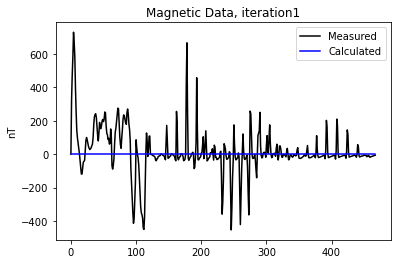

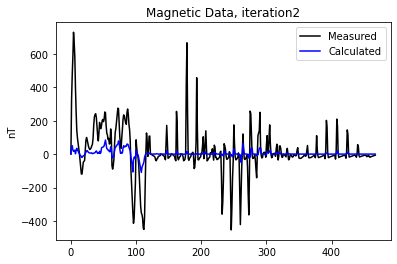

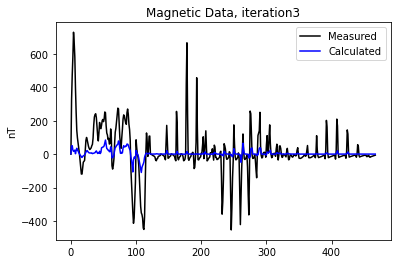

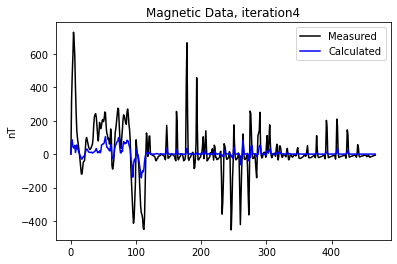

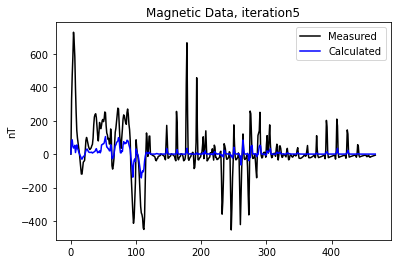

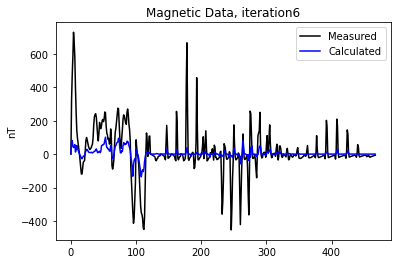

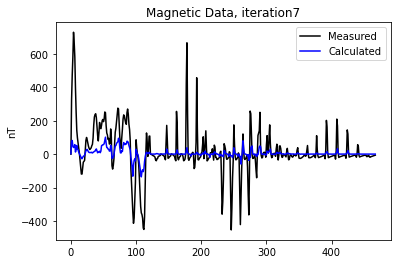

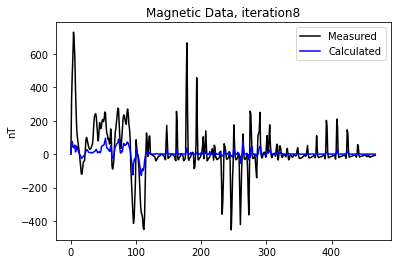

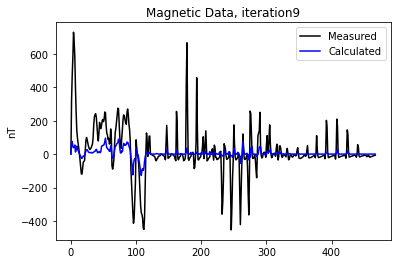

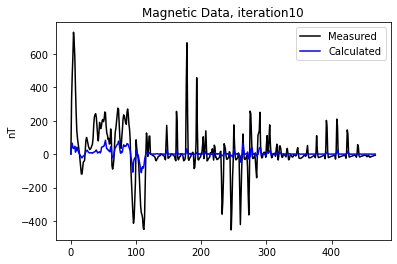

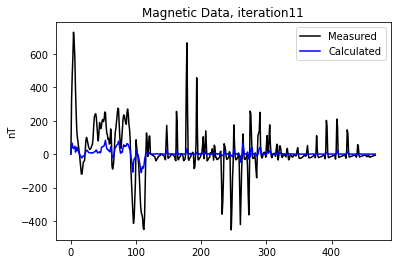

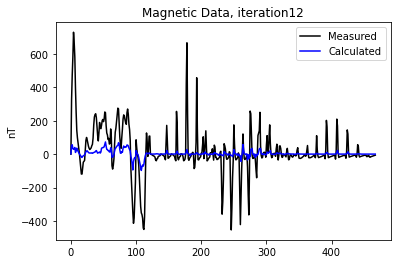

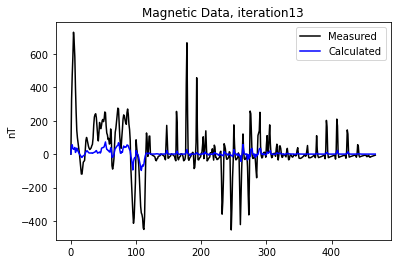

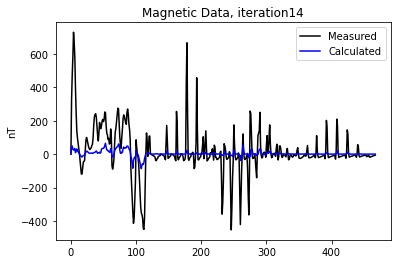

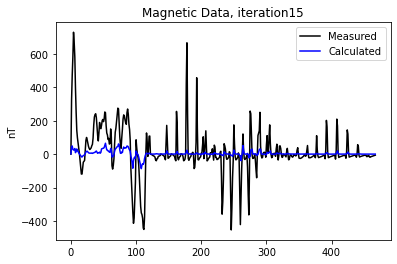

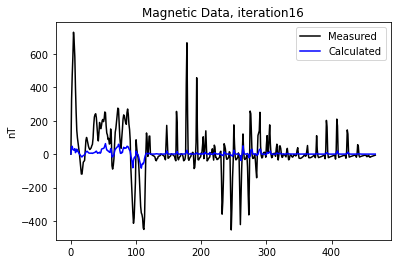

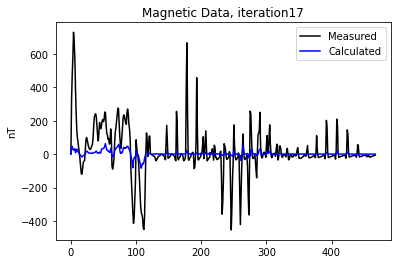

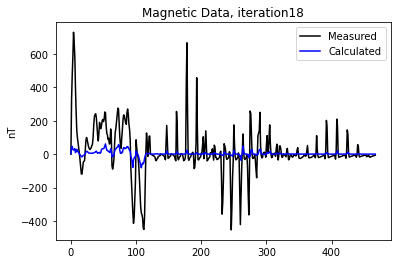

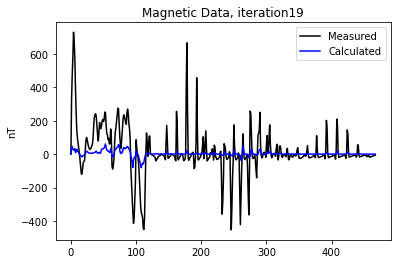

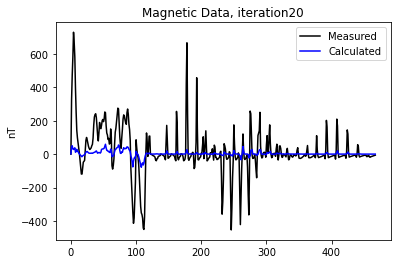

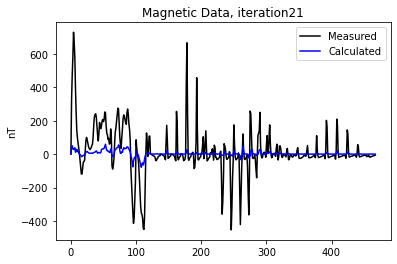

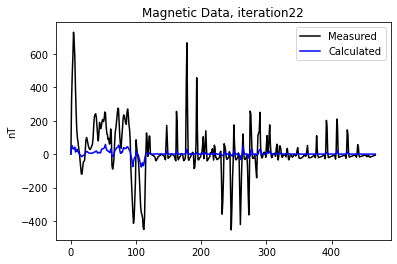

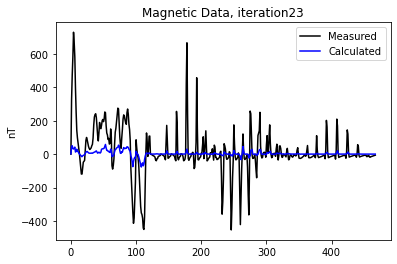

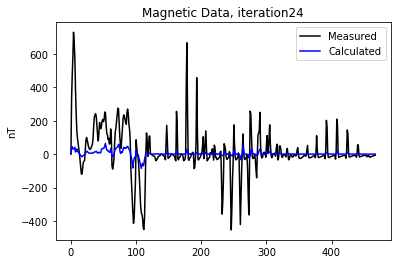

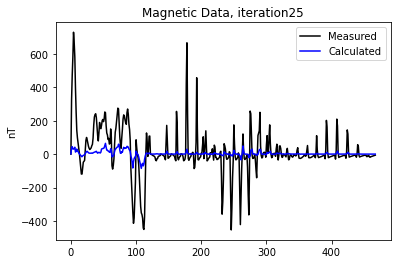

In [9]:
#Magnetometria
#Lectura datos
filename3 = 'input_d_mg.csv'
#d_mg = pd.read_csv(filename3, sep=',', header=0, usecols=['x_utm', 'y_utm', 'anom_CT_residual'])
d_mg = pd.read_csv(filename3, sep=',', header=0, usecols=[0,1,3])
print(d_mg.head)

#Seleccion de columnas
x = d_mg.iloc[:,0]
y = d_mg.iloc[:,1]
d = pd.Series(d_mg.iloc[:,2])

num = np.arange(0, len(d), 1, dtype=int)

for i in range(1,10):
    #Desajuste de datos
    filename4 = f'output_jointGram_mg_anomaly_c1_iter {i}.csv'
    iter1 = pd.read_csv(filename4, sep=',', header=0, usecols=['m[nT]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p


    # Crear figura 3D
    ########################################
    #%matplotlib notebook #figura interactiva
    #fig = plt.figure(figsize = (10, 8))
    #ax = plt.axes(projection ="3d")

    # Crear gráfico
    #ax.scatter3D(x,y,0, s=20, color='black')
    #ax.scatter3D(x,y,misfit, s=50, color='red')

    #plt.title("Datos Magnéticos")
    #ax.set_xlabel('x_utm')
    #ax.set_ylabel('y_utm')
    #ax.set_zlabel('nT')
    #punto de vista
    #ax.view_init(0,90)

    # desactivar formato cientifico en etiquetas
    #current_values = plt.gca().get_yticks()
    #plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    # ejes proporcionales
    #ax.set_aspect('equal', adjustable='box')
    #plt.axis("equal")
    ########################################

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'b-')
    legend = plt.legend(['Measured','Calculated'])
    plt.title(f"Magnetic Data, iteration{i}")
    plt.ylabel('nT')
    #plt.show()
    
    #Exportar imagenes en carpeta
    #plt.savefig(f"ajuste_datos_mg_iter{i}.jpg", dpi=400)
    
for i in range(10,iteraciones):
    #Desajuste de datos
    filename4 = f'output_jointGram_mg_anomaly_c1_iter{i}.csv'
    iter1 = pd.read_csv(filename4, sep=',', header=0, usecols=['m[nT]'])
    print(iter1.head)

    p = pd.Series(iter1.iloc[:,0])
    misfit = d-p

    fig = plt.figure()
    plt.plot(num, d, 'k-')
    plt.plot(num, p, 'b-')
    legend = plt.legend(['Measured','Calculated'])
    plt.title(f"Magnetic Data, iteration{i}")
    plt.ylabel('nT')

    #Exportar imagenes en carpeta
    #plt.savefig(f"ajuste_datos_mg_iter{i}.jpg", dpi=400)

<ipython-input-10-fcfed1b4f6e0>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


FileNotFoundError: [Errno 2] No such file or directory: 'output_jointGram_gv_minv_c1_iter26.csv'

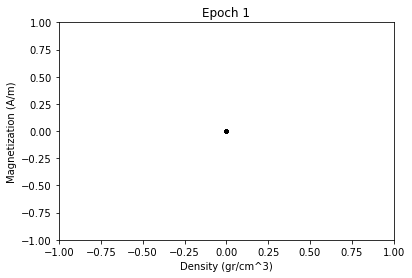

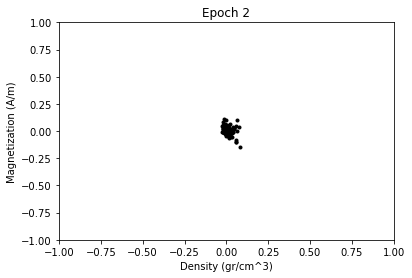

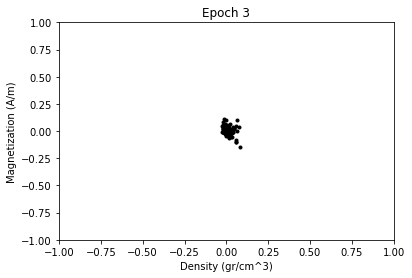

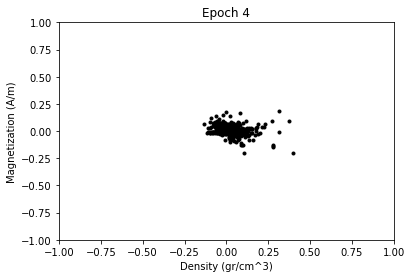

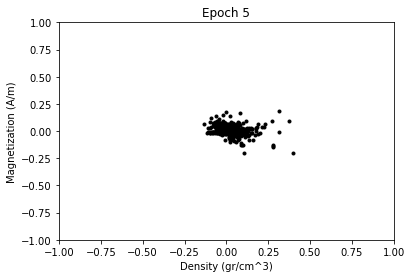

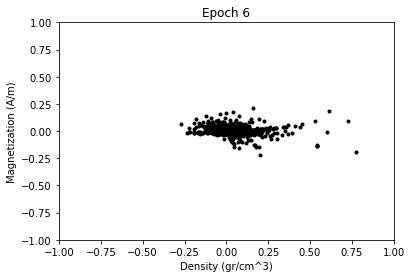

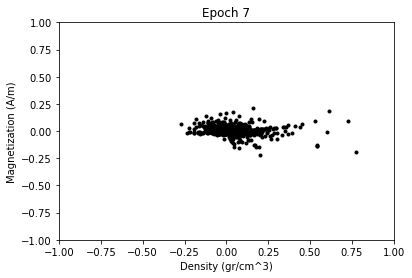

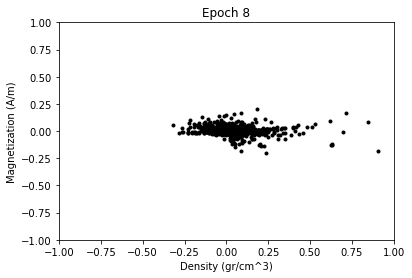

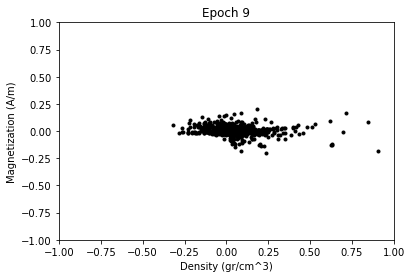

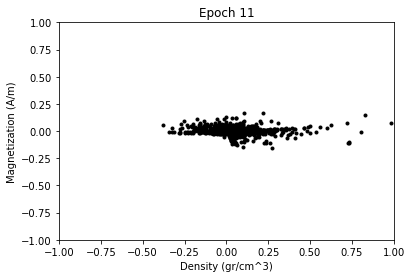

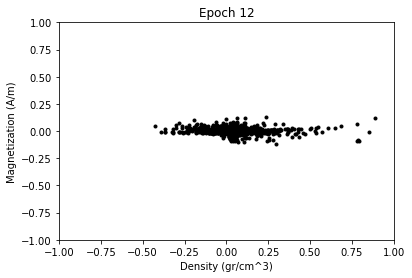

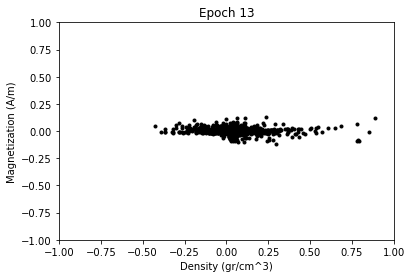

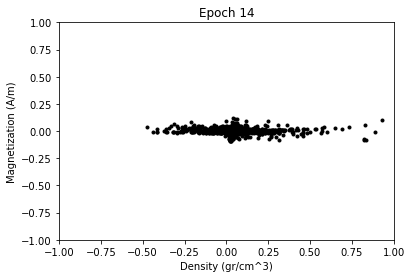

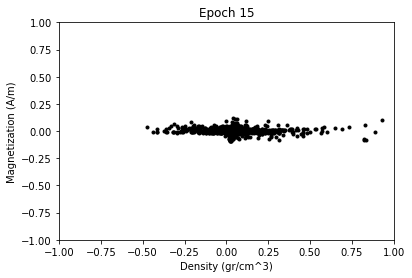

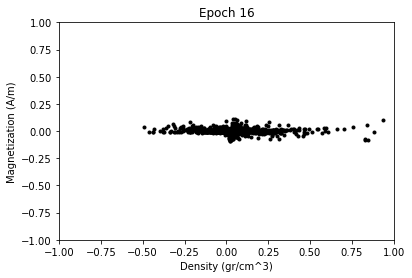

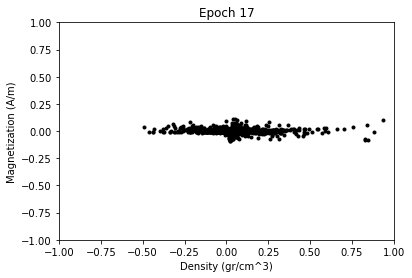

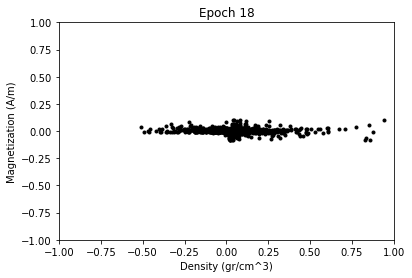

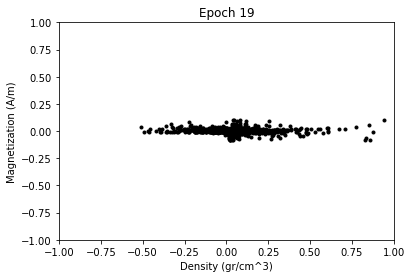

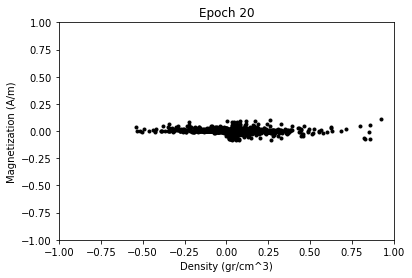

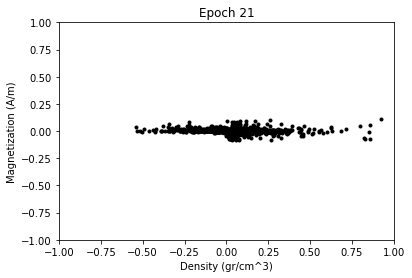

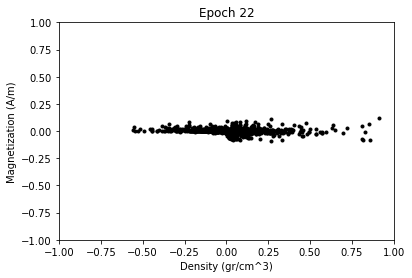

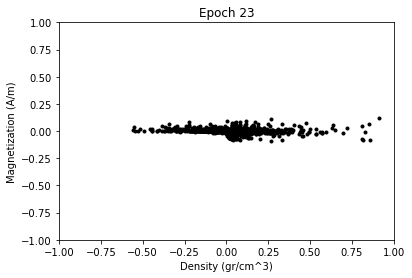

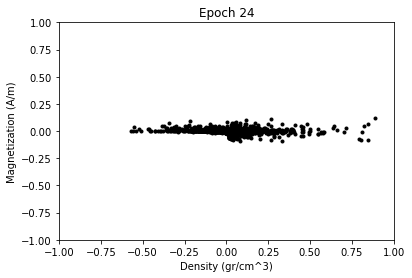

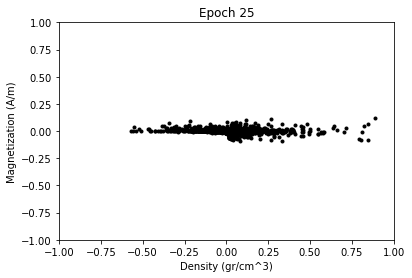

In [10]:
# Graficado de datos gravimétricos vs magnéticos en scatter

for i in range(1,10):
    #Gravimetria 
    filename1 = f'output_jointGram_gv_minv_c1_iter {i}.csv'
    gv = pd.read_csv(filename1, sep=',', header=0, usecols=[3])
    #print(gv.head)
    
    #Magnetometria 
    filename2 = f'output_jointGram_mg_minv_c1_iter {i}.csv'
    mg = pd.read_csv(filename2, sep=',', header=0, usecols=[3])
    #print(mg.head)
    
    fig = plt.figure()
    plt.scatter(gv, mg, color="black", marker='.')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title(f"Epoch {i}")
    plt.xlabel('Density (gr/cm^3)')
    plt.ylabel('Magnetization (A/m)')
    #plt.show()
    
for i in range(11,iteraciones+1):
    #Gravimetria 
    filename1 = f'output_jointGram_gv_minv_c1_iter{i}.csv'
    gv = pd.read_csv(filename1, sep=',', header=0, usecols=[3])
    #print(gv.head)
    
    #Magnetometria 
    filename2 = f'output_jointGram_mg_minv_c1_iter{i}.csv'
    mg = pd.read_csv(filename2, sep=',', header=0, usecols=[3])
    #print(mg.head)
    
    fig = plt.figure()
    plt.scatter(gv, mg, color="black", marker='.')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title(f"Epoch {i}")
    plt.xlabel('Density (gr/cm^3)')
    plt.ylabel('Magnetization (A/m)')
    #plt.show()